<h1 style="text-align: center;">WSI - ćwiczenie 6. - Sieci neuronowe</h1>

In [10]:
from neural_network import NeuralNetwork, InputLayer, HiddenLayer
from activation import Activation
from loss import Loss
import numpy as np
from prepare_data import prepare_data
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, RocCurveDisplay

### Badanie precyzji i czułości modelu w zależności od wyboru funkcji aktywacji:

### Eksperyment 1:
 - 3 warstwy:
    1. wejściowa - 3 nerurony
    2. ukryta - 10 neuronów
    3. końcowa - 20 neuronów
 - sigmoidalna funkcja aktywacji
 - 10 iteracji
 - learning rate - 0.1

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

nn = NeuralNetwork([
    InputLayer(3),
    HiddenLayer(10, Activation.sigmoid),
    HiddenLayer(20, Activation.sigmoid),
])

nn.fit(X_train, y_train, epochs=10, learning_rate=0.1)

In [21]:
y_pred = nn.predict(X_test)

precision1 = precision_score(y_test, y_pred, average='micro')
recall1 = recall_score(y_test, y_pred, average='micro')
roc1 = roc_auc_score(y_test, y_pred, average='micro')
print(precision1)
print(recall1)
print(roc1)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.6368005492619293
0.6368005492619293
0.8088423943483838


### Wyniki:
 - precyzja: 0.64
 - czułość: 0.64
 - ROC AUC score: 0.80

### Eksperyment 2:
 - 3 warstwy:
    1. wejściowa - 3 nerurony
    2. ukryta - 10 neuronów
    3. końcowa - 20 neuronów
 - funkcja aktywacji: RELU
 - 10 iteracji
 - learning rate - 0.1

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

nn = NeuralNetwork([
    InputLayer(3),
    HiddenLayer(10, Activation.relu),
    HiddenLayer(20, Activation.relu),
])

nn.fit(X_train, y_train, epochs=10, learning_rate=0.1)

In [26]:
y_pred = nn.predict(X_test)

precision2 = precision_score(y_test, y_pred, average='micro')
recall2 = recall_score(y_test, y_pred, average='micro')
roc2 = roc_auc_score(y_test, y_pred, average='micro')
print(precision2)
print(recall2)
print(roc2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.3468932372124957
0.3468932372124957
0.6562595985328925


### Wyniki:
 - precyzja: 0.34
 - czułość: 0.34
 - ROC AUC score: 0.66

### Eksperyment 3:
 - 3 warstwy:
    1. wejściowa - 3 nerurony
    2. ukryta - 10 neuronów
    3. końcowa - 20 neuronów
 - funkcja aktywacji: tanh
 - 10 iteracji
 - learning rate - 0.1

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

nn = NeuralNetwork([
    InputLayer(3),
    HiddenLayer(10, Activation.tanh),
    HiddenLayer(20, Activation.tanh),
])

nn.fit(X_train, y_train, epochs=10, learning_rate=0.1)

In [31]:
y_pred = nn.predict(X_test)

precision3 = precision_score(y_test, y_pred, average='micro')
recall3 = recall_score(y_test, y_pred, average='micro')
roc3 = roc_auc_score(y_test, y_pred, average='micro')
print(precision3)
print(recall3)
print(roc3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.2588396841743907
0.2588396841743907
0.6099156232496794


### Wyniki:
 - precyzja: 0.26
 - czułość: 0.26
 - ROC AUC score: 0.61

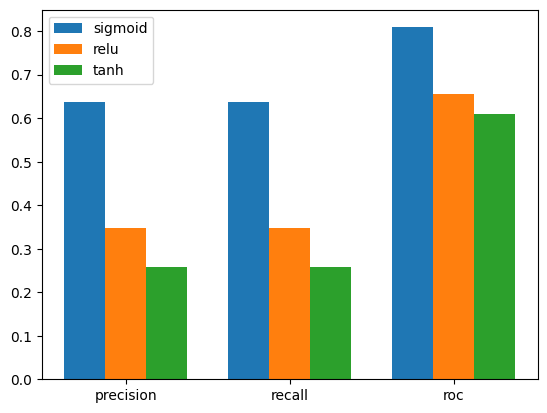

In [33]:
exp1 = [precision1, recall1, roc1, 'sigmoid']
exp2 = [precision2, recall2, roc2, 'relu']
exp3 = [precision3, recall3, roc3, 'tanh']
fig, ax = plt.subplots()
ax.bar(np.arange(3), exp1[:3], width=0.25, label=exp1[3])
ax.bar(np.arange(3)+0.25, exp2[:3], width=0.25, label=exp2[3])
ax.bar(np.arange(3)+0.5, exp3[:3], width=0.25, label=exp3[3])
ax.set_xticks(np.arange(3)+0.25)
ax.set_xticklabels(['precision', 'recall', 'roc'])
ax.legend()
plt.show()

## Wnioski:
 - dla tego zbioru danych najlepsze wyniki osiągamy dla sigmoidalnej funkcji aktywacji

### Badanie precyzji i czułości modelu w zależności od parametru uczenia:

### Eksperyment 1:
 - 3 warstwy:
    1. wejściowa - 3 nerurony
    2. ukryta - 10 neuronów
    3. końcowa - 20 neuronów
 - funkcja aktywacji: sigmoidalna
 - 10 iteracji
 - learning rate - 0.01

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

nn = NeuralNetwork([
    InputLayer(3),
    HiddenLayer(10, Activation.sigmoid),
    HiddenLayer(20, Activation.sigmoid),
])

nn.fit(X_train, y_train, epochs=10, learning_rate=0.01)

In [63]:
y_pred = nn.predict(X_test)

precision4 = precision_score(y_test, y_pred, average='micro')
recall4 = recall_score(y_test, y_pred, average='micro')
roc4 = roc_auc_score(y_test, y_pred, average='micro')
print(precision4)
print(recall4)
print(roc4)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.6163748712667353
0.6163748712667353
0.798092037508808


### Wyniki:
 - precyzja: 0.62
 - czułość: 0.62
 - ROC AUC score: 0.80

### Eksperyment 2:
 - 3 warstwy:
    1. wejściowa - 3 nerurony
    2. ukryta - 10 neuronów
    3. końcowa - 20 neuronów
 - funkcja aktywacji: sigmoidalna
 - 10 iteracji 
 - learning rate - 0.3

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

nn = NeuralNetwork([
    InputLayer(3),
    HiddenLayer(10, Activation.sigmoid),
    HiddenLayer(20, Activation.sigmoid),
])

nn.fit(X_train, y_train, epochs=10, learning_rate=0.3)

In [67]:
y_pred = nn.predict(X_test)

precision5 = precision_score(y_test, y_pred, average='micro')
recall5 = recall_score(y_test, y_pred, average='micro')
roc5 = roc_auc_score(y_test, y_pred, average='micro')
print(precision5)
print(recall5)
print(roc5)

0.5621352557500858
0.5621352557500858
0.7695448714474136


### Wyniki:
 - precyzja: 0.56
 - czułość: 0.56
 - ROC AUC score: 0.77

### Eksperyment 3:
 - 3 warstwy:
    1. wejściowa - 3 nerurony
    2. ukryta - 10 neuronów
    3. końcowa - 20 neuronów
 - funkcja aktywacji: sigmoidalna
 - 10 iteracji
 - learning rate - 0.5

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

nn = NeuralNetwork([
    InputLayer(3),
    HiddenLayer(10, Activation.sigmoid),
    HiddenLayer(20, Activation.sigmoid),
])

nn.fit(X_train, y_train, epochs=10, learning_rate=0.5)

In [41]:
y_pred = nn.predict(X_test)

precision6 = precision_score(y_test, y_pred, average='micro')
recall6 = recall_score(y_test, y_pred, average='micro')
roc6 = roc_auc_score(y_test, y_pred, average='micro')
print(precision6)
print(recall6)
print(roc6)

/home/mbaj/Desktop/WSI/laby/wsi/lab6 - neural-network/activation.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.5950909715070374
0.5950909715070374
0.7868899850037039


### Wyniki:
 - precyzja: 0.6
 - czułość: 0.6
 - ROC AUC score: 0.79

### Eksperyment 4:
 - 3 warstwy:
    1. wejściowa - 3 nerurony
    2. ukryta - 10 neuronów
    3. końcowa - 20 neuronów
 - funkcja aktywacji: sigmoidalna
 - 10 iteracji
 - learning rate - 0.7

In [ ]:
X_train, X_test, y_train, y_test = prepare_data()

nn = NeuralNetwork([
    InputLayer(3),
    HiddenLayer(10, Activation.sigmoid),
    HiddenLayer(20, Activation.sigmoid),
])

nn.fit(X_train, y_train, epochs=10, learning_rate=0.7)

In [43]:
y_pred = nn.predict(X_test)

precision7 = precision_score(y_test, y_pred, average='micro')
recall7 = recall_score(y_test, y_pred, average='micro')
roc7 = roc_auc_score(y_test, y_pred, average='micro')
print(precision7)
print(recall7)
print(roc7)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.5540679711637487
0.5540679711637487
0.7652989321914467


### Wyniki:
 - precyzja: 0.55
 - czułość: 0.55
 - ROC AUC score: 0.77

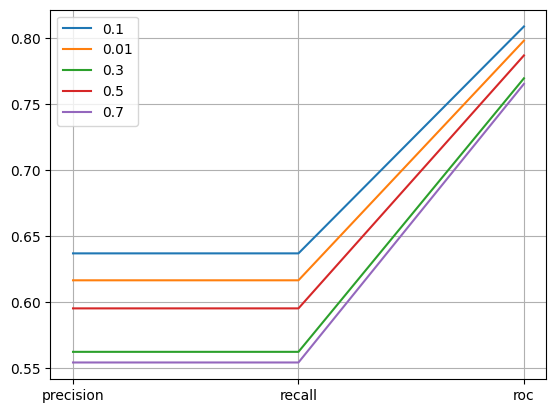

In [77]:
exp0 = [precision1, recall1, roc1, '0.1']
exp1 = [precision4, recall4, roc4, '0.01']
exp2 = [precision5, recall5, roc5, '0.3']
exp3 = [precision6, recall6, roc6, '0.5']
exp4 = [precision7, recall7, roc7, '0.7']
exps = [exp0, exp1, exp2, exp3, exp4]
fig, ax = plt.subplots()
for exp in exps:
    ax.plot(np.arange(3), exp[:3], label=exp[3])
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['precision', 'recall', 'roc'])
ax.legend()
plt.grid()
plt.show()


## Wnioski:
 - dla tego zbioru danych najlepsze wyniki uzyskujemy dla learning rate równego 0.1